# Test compact scheme using OPS C
### Jianping Meng
A variable u in 3D is initialised with $\sin(x) \sin(2y) \sin(3z)$ and the fourth-order compact is implemented to calculate $u_x$, $u_y$,$u_z$.

## Functions for analytical solutions

In [1]:
using Symbolics

In [2]:
@variables X Y Z

3-element Vector{Num}:
 X
 Y
 Z

In [3]:
Symbolics.derivative(sin(X)*sin(2*Y)*sin(3*Z),X)

cos(X)*sin(2Y)*sin(3Z)

In [4]:
Symbolics.derivative(sin(X)*sin(2*Y)*sin(3*Z),Y)

2sin(X)*cos(2Y)*sin(3Z)

In [5]:
Symbolics.derivative(sin(X)*sin(2*Y)*sin(3*Z),Z)

3sin(X)*sin(2Y)*cos(3Z)

In [6]:
function CalcU(x,y,z)
    return sin(x)*sin(2*y)*sin(3*z)
end

function CalcUx(x,y,z)
    return cos(x)*sin(2*y)*sin(3*z)
end

function CalcUy(x,y,z)
    return 2*sin(x)*cos(2*y)*sin(3*z)
end

function CalcUz(x,y,z)
    return 3*sin(x)*sin(2*y)*cos(3*z)
end


CalcUz (generic function with 1 method)

## Read simulation data

In [7]:
using HDF5

In [8]:
res_dev = h5open("Compact3D_develop_br.h5", "r");
u_dev   = res_dev["Compact3D"]["u"][2:end-1, 2:end-1, 2:end-1];
ux_dev  = res_dev["Compact3D"]["ux"][2:end-1, 2:end-1, 2:end-1];
uy_dev  = res_dev["Compact3D"]["uy"][2:end-1, 2:end-1, 2:end-1];
uz_dev  = res_dev["Compact3D"]["uz"][2:end-1, 2:end-1, 2:end-1];
close(res_dev)

In [9]:
res_tr_h0 = h5open("Compact3D_trid_range_br_h0.h5", "r");
u_tr_h0   = res_tr_h0["Compact3D"]["u"][2:end-1, 2:end-1, 2:end-1];
ux_tr_h0  = res_tr_h0["Compact3D"]["ux"][2:end-1, 2:end-1, 2:end-1];
uy_tr_h0  = res_tr_h0["Compact3D"]["uy"][2:end-1, 2:end-1, 2:end-1];
uz_tr_h0  = res_tr_h0["Compact3D"]["uz"][2:end-1, 2:end-1, 2:end-1];
close(res_tr_h0)

In [10]:
res_tr_h1 = h5open("Compact3D_trid_range_br_h1.h5", "r");
u_tr_h1   = res_tr_h1["Compact3D"]["u"][2:end-1, 2:end-1, 2:end-1];
ux_tr_h1  = res_tr_h1["Compact3D"]["ux"][2:end-1, 2:end-1, 2:end-1];
uy_tr_h1  = res_tr_h1["Compact3D"]["uy"][2:end-1, 2:end-1, 2:end-1];
uz_tr_h1  = res_tr_h1["Compact3D"]["uz"][2:end-1, 2:end-1, 2:end-1];
close(res_tr_h1)

## Construct "correct" data

In [11]:
halo = 0;
nx = 32;
n=nx+2*halo;
L=2*pi;
h=(L)/(nx-1);
U=zeros((n,n,n));
Ux=zeros((n,n,n));
Uy=zeros((n,n,n));
Uz=zeros((n,n,n));
lx=zeros(n);
ly=zeros(n);
lz=zeros(n);
U=[CalcU((i-1-halo)*h,(j-1-halo)*h,(k-1-halo)*h) for i=1:n,j=1:n,k=1:n];
Ux=[CalcUx((i-1-halo)*h,(j-1-halo)*h,(k-1-halo)*h) for i=1:n,j=1:n,k=1:n];
Uy=[CalcUy((i-1-halo)*h,(j-1-halo)*h,(k-1-halo)*h) for i=1:n,j=1:n,k=1:n];
Uz=[CalcUz((i-1-halo)*h,(j-1-halo)*h,(k-1-halo)*h) for i=1:n,j=1:n,k=1:n];
lx=[(i-1-halo)*h for i=1:n];
ly=[(j-1-halo)*h for j=1:n];
lz=[(k-1-halo)*h for k=1:n];

In [12]:
halo = 1;
nx = 32;
n=nx+2*halo;
L=2*pi;
h=(L)/(nx-1);
U_h1=zeros((n,n,n));
Ux_h1=zeros((n,n,n));
Uy_h1=zeros((n,n,n));
Uz_h1=zeros((n,n,n));
lx_h1=zeros(n);
ly_h1=zeros(n);
lz_h1=zeros(n);
U_h1=[CalcU((i-1-halo)*h,(j-1-halo)*h,(k-1-halo)*h) for i=1:n,j=1:n,k=1:n];
Ux_h1=[CalcUx((i-1-halo)*h,(j-1-halo)*h,(k-1-halo)*h) for i=1:n,j=1:n,k=1:n];
Uy_h1=[CalcUy((i-1-halo)*h,(j-1-halo)*h,(k-1-halo)*h) for i=1:n,j=1:n,k=1:n];
Uz_h1=[CalcUz((i-1-halo)*h,(j-1-halo)*h,(k-1-halo)*h) for i=1:n,j=1:n,k=1:n];
lx_h1=[(i-1-halo)*h for i=1:n];
ly_h1=[(j-1-halo)*h for j=1:n];
lz_h1=[(k-1-halo)*h for k=1:n];

## L<sup>2</sup> errors

In [13]:
using Printf

In [14]:
l2_u_dev  = sqrt(sum((U - u_dev).^2) / sum(U.^2));
l2_ux_dev = sqrt(sum((Ux - ux_dev).^2) / sum(Ux.^2));
l2_uy_dev = sqrt(sum((Uy - uy_dev).^2) / sum(Uy.^2));
l2_uz_dev = sqrt(sum((Uz - uz_dev).^2) / sum(Uz.^2));

@printf("Develop branch:\nU error = %g\nUx error = %g\nUy error = %g\nUz error = %g\n", l2_u_dev, l2_ux_dev, l2_uy_dev, l2_uz_dev);

Develop branch:
U error = 4.25798e-13
Ux error = 0.00246824
Uy error = 0.00980255
Uz error = 0.0218013


In [15]:
l2_u_tr_h0  = sqrt(sum((U - u_tr_h0).^2) / sum(U.^2));
l2_ux_tr_h0 = sqrt(sum((Ux - ux_tr_h0).^2) / sum(Ux.^2));
l2_uy_tr_h0 = sqrt(sum((Uy - uy_tr_h0).^2) / sum(Uy.^2));
l2_uz_tr_h0 = sqrt(sum((Uz - uz_tr_h0).^2) / sum(Uz.^2));

@printf("Trid range branch, 0 halo:\nU error = %g\nUx error = %g\nUy error = %g\nUz error = %g\n", l2_u_tr_h0, l2_ux_tr_h0, l2_uy_tr_h0, l2_uz_tr_h0);

Trid range branch, 0 halo:
U error = 4.25798e-13
Ux error = 0.00246824
Uy error = 0.00980255
Uz error = 0.0218013


In [16]:
l2_u_tr_h1  = sqrt(sum((U_h1 - u_tr_h1).^2) / sum(U_h1.^2));
l2_ux_tr_h1 = sqrt(sum((Ux_h1 - ux_tr_h1).^2) / sum(Ux_h1.^2));
l2_uy_tr_h1 = sqrt(sum((Uy_h1 - uy_tr_h1).^2) / sum(Uy_h1.^2));
l2_uz_tr_h1 = sqrt(sum((Uz_h1 - uz_tr_h1).^2) / sum(Uz_h1.^2));

@printf("Trid range branch, 1 halo:\nU error = %g\nUx error = %g\nUy error = %g\nUz error = %g\n", l2_u_tr_h1, l2_ux_tr_h1, l2_uy_tr_h1, l2_uz_tr_h1);

Trid range branch, 1 halo:
U error = 4.45623e-13
Ux error = 0.00228829
Uy error = 0.00857873
Uz error = 0.0171973


## Plot results, 0 halo

In [17]:
using LaTeXStrings
using Plots
gr()

Plots.GRBackend()

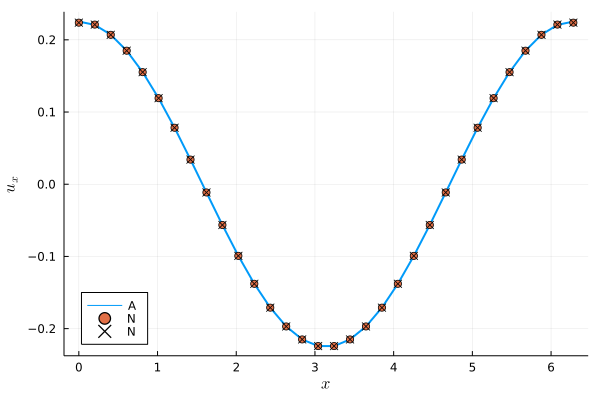

In [18]:
plot(lx,Ux[:,2,2],lw=2,markersize=0,label="A",xlabel=L"x",ylabel=L"u_x",legend=:bottomleft)
plot!(lx,ux_dev[:,2,2],lw=0,lc=:white,markersize=4,markershape=:circle,label="N")
plot!(lx,ux_tr_h0[:,2,2],lw=0,lc=:white,markersize=4,markershape=:xcross,markercolor=:black,label="N")

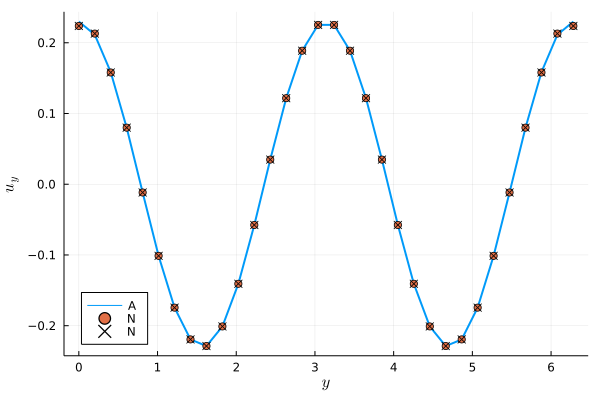

In [19]:
plot(ly,Uy[2,:,2], lw=2,markersize=0,label="A",xlabel=L"y",ylabel=L"u_y",legend=:bottomleft)
plot!(ly,uy_dev[2,:,2],lw=0,lc=:white,markersize=4,markershape=:circle,label="N")
plot!(ly,uy_tr_h0[2,:,2],lw=0,lc=:white,markersize=4,markershape=:xcross,markercolor=:black,label="N")

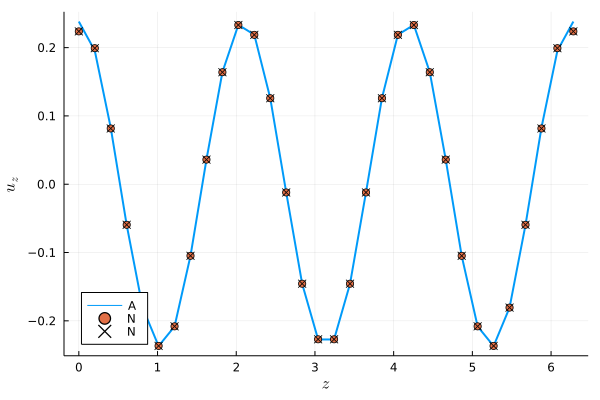

In [20]:
plot(lz,Uz[2,2,:], lw=2,markersize=0,label="A",xlabel=L"z",ylabel=L"u_z",legend=:bottomleft)
plot!(lz,uz_dev[2,2,:],lw=0,lc=:white,markersize=4,markershape=:circle,label="N")
plot!(lz,uz_tr_h0[2,2,:],lw=0,lc=:white,markersize=4,markershape=:xcross,markercolor=:black,label="N")

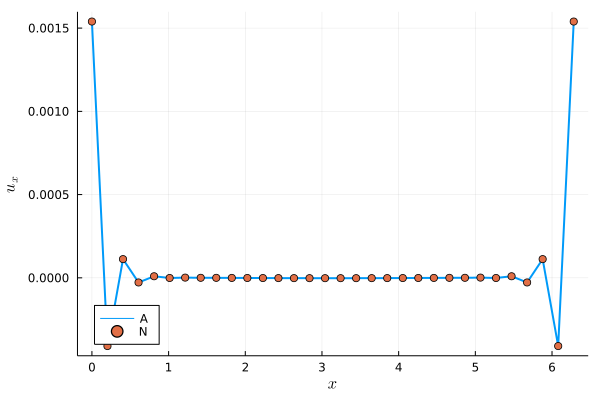

In [21]:
plot(lx,Ux[:,2,2] - ux_dev[:,2,2], lw=2,markersize=0,label="A",xlabel=L"x",ylabel=L"u_x",legend=:bottomleft)
plot!(lx,Ux[:,2,2] - ux_tr_h0[:,2,2],lw=0,lc=:white,markersize=4,markershape=:circle,label="N")

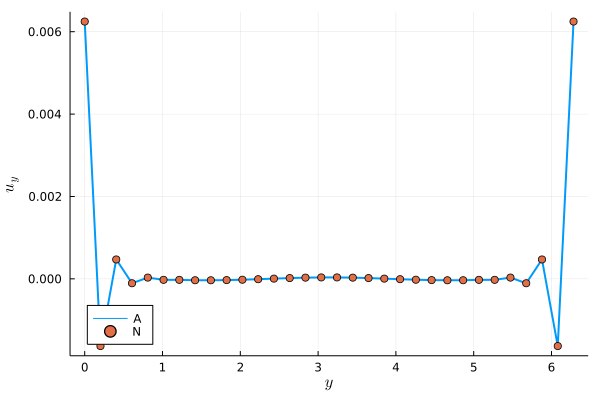

In [22]:
plot(ly,Uy[2,:,2] - uy_dev[2,:,2], lw=2,markersize=0,label="A",xlabel=L"y",ylabel=L"u_y",legend=:bottomleft)
plot!(ly,Uy[2,:,2] - uy_tr_h0[2,:,2],lw=0,lc=:white,markersize=4,markershape=:circle,label="N")

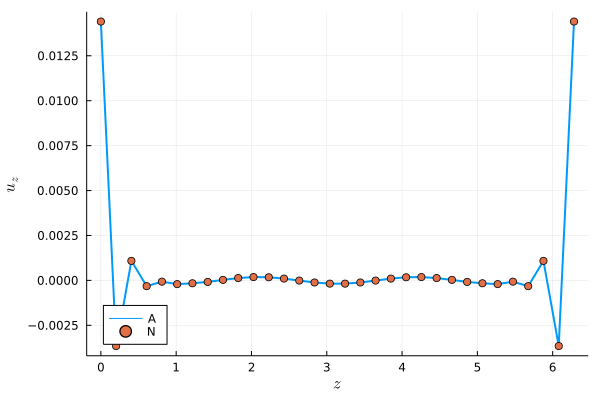

In [23]:
plot(lz,Uz[2,2,:] - uz_dev[2,2,:], lw=2,markersize=0,label="A",xlabel=L"z",ylabel=L"u_z",legend=:bottomleft)
plot!(lz,Uz[2,2,:] - uz_tr_h0[2,2,:],lw=0,lc=:white,markersize=4,markershape=:circle,label="N")

## Plot results, 1 halo

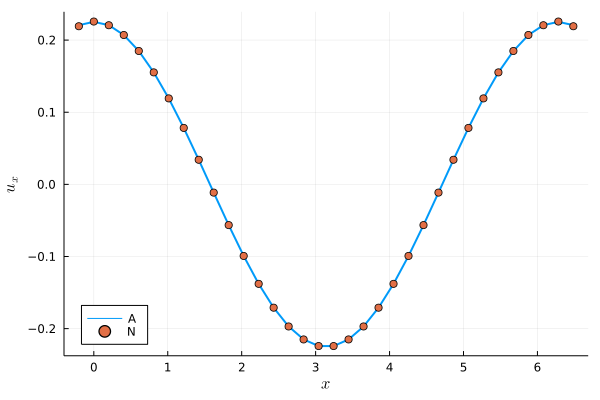

In [24]:
plot(lx_h1,Ux_h1[:,3,3],lw=2,markersize=0,label="A",xlabel=L"x",ylabel=L"u_x",legend=:bottomleft)
plot!(lx_h1,ux_tr_h1[:,3,3],lw=0,lc=:white,markersize=4,markershape=:circle,label="N")

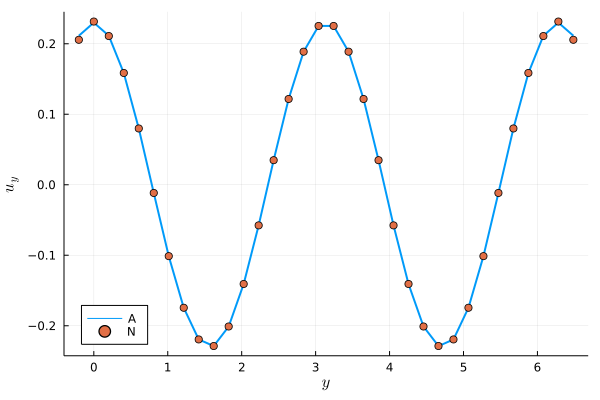

In [25]:
plot(ly_h1,Uy_h1[3,:,3], lw=2,markersize=0,label="A",xlabel=L"y",ylabel=L"u_y",legend=:bottomleft)
plot!(ly_h1,uy_tr_h1[3,:,3],lw=0,lc=:white,markersize=4,markershape=:circle,label="N")

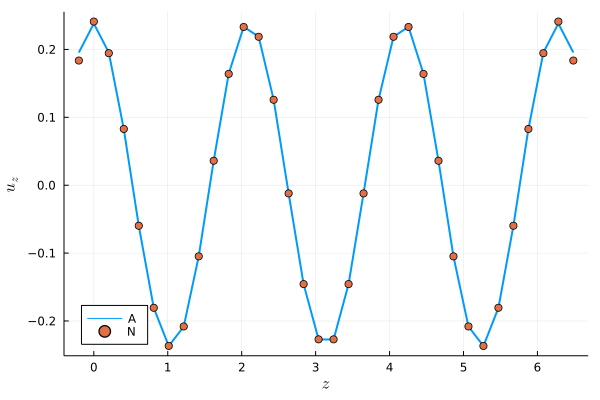

In [26]:
plot(lz_h1,Uz_h1[3,3,:], lw=2,markersize=0,label="A",xlabel=L"z",ylabel=L"u_z",legend=:bottomleft)
plot!(lz_h1,uz_tr_h1[3,3,:],lw=0,lc=:white,markersize=4,markershape=:circle,label="N")

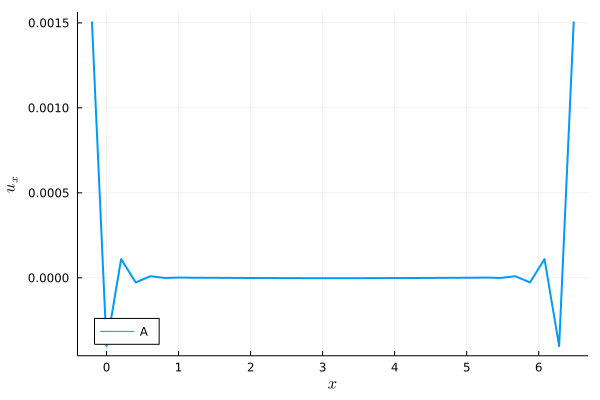

In [27]:
plot(lx_h1,Ux_h1[:,3,3] - ux_tr_h1[:,3,3], lw=2,markersize=0,label="A",xlabel=L"x",ylabel=L"u_x",legend=:bottomleft)

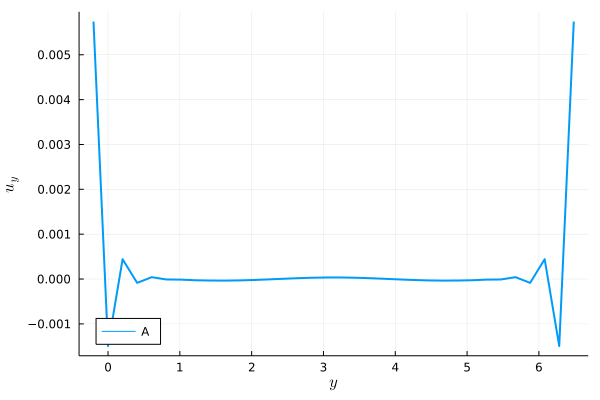

In [28]:
plot(ly_h1,Uy_h1[3,:,3] - uy_tr_h1[3,:,3], lw=2,markersize=0,label="A",xlabel=L"y",ylabel=L"u_y",legend=:bottomleft)

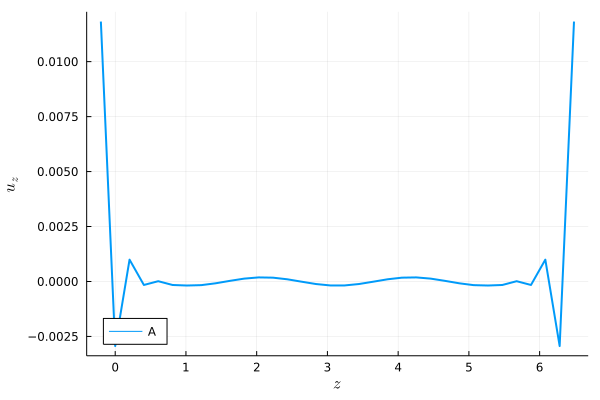

In [29]:
plot(lz_h1,Uz_h1[3,3,:] - uz_tr_h1[3,3,:], lw=2,markersize=0,label="A",xlabel=L"z",ylabel=L"u_z",legend=:bottomleft)